In [1]:
%matplotlib inline
import os
import subprocess

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Projeto 2

### Eduardo Tirta  


## Introdução

Neste projeto iremos trabalhar em uma área chamada Otimizacão discreta, que estuda problemas de otimizacão
em que as variáveis correspondem a uma sequência de escolhas e que tem uma característica especial: a solucão
ótima só pode ser encontrada se enumerarmos todas as escolhas possíveis, Ou seja: não existem algoritmos
eficientes para sua resolucão. Isto significa que todo algoritmo para sua solucão é O(2n) ou pior. Inclusive, ao
recebermos uma solucão só conseguimos saber se ela é a melhor se olhando para todas as outras de novo!
Claramente, estes problemas são interessantes para computacão paralela: podemos diminuir seu consumo de
tempo consideravelmente se realizarmos testes em paralelo.

Um problema muito popular na área de logística é o Caixeiro Viajante:
Um vendedor possui uma lista de empresas que ele deverá visitar em um certo dia. Não existe uma
ordem fixa: desde que todos sejam visitados seu objetivo do dia está cumprido. Interessado em
passar o maior tempo possível nos clientes ele precisa encontrar a sequência de visitas que resulta
no menor caminho.

Vamos assumir que:
• o nosso caixeiro usa Waze e já sabe qual é o caminho com a menor distância entre dois pontos;
• ele começa seu trajeto na empresa 0 . Ou seja, basta ele encontrar um trajeto que passe por todas as
outras e volte a empresa 0 ;
• ele não pode passar duas vezes na mesma empresa. Ou seja, a saída é uma permutação de 0 ... (N-1)

Nosso trabalho será encontrar esse caminho e fornecê-lo ao vendedor. Note que esta mesma formulação pode
ser usada (ou adaptada) para empresas de entregas com caminhões.
Finalmente, os objetivos deste projeto são

1. implementar uma versão sequencial em C++ do caixeiro viajante a partir de uma implementação em Python.
2. Estudar e implementar os seguintes métodos paralelos:
    * enumeracão exaustiva em paralelo
    * busca local paralela usando 2-opt
    * branch and bound (ou heuristic search)

## Desenvolvimento e Otimização

O projeto consiste na otimização do problema do caixeiro viajante, fornecido em python.

O primeiro passo do trabalho foi transformar o código em python para C++, assim, possibilita a paralelização do problema de enumeração exaustiva. Essa otimização paralelizada utiliza OMP parallel para gerar tasks que vão ser chamadas recursivamente e assim, gerar uma solução mais rápida por dividir a quantidade de processos em threads. 
Outra solução para deixar mais rápido o tempo de resposta do programa, foi utilizar o método branch and bound, o que faz com que o código pare de percorrer outras possibilidades, caso o valor calculado até aquele momento seja maior que o custo da melhor solução que já foi terminada, esse método já auxilia muito a velocidade. Já que impede de percorrer exaustivamente todo os caminhos possíveis.

## Branch and bound

O conceito do branch and bound é bem simples, ele otimiza o algoritmo fazendo com que o programa não necessita realizar todos os caminhos exaustivamente, claro que no pior caso, pode ser que percorra todo o caminho e possibilidade, mas geralmente não existe essa possibilidade.
O código impede que seja totalmente percorrida, com uma base que ao percorrer um caminho e visto o custo dele, se no meio do proximo caminho ja for maior que o caminho percorrido anteriormente, nao é necessario terminar o caminho, já que sabemos que existe um caminho de melhor distância.

## Especificação do computador

Todos os testes foram feitos em um computador rodando em lixux, ubuntu 18 com processador i7, setima geração e 16 de RAM.

## Testes do projeto

O projeto possui 5 arquivos com o código do caxeiro viajante, além de 1 arquivo que gera numeros aleatorios representando os pontos que o viajante precisa passar.

* Arquivo tsp.py, codigo referencia feita pelo Igor utilizando o método de enumeração exaustiva
* Arquivo tsp-seq.cpp, codigo "traduzido" do referencia feita em python
* Arquivo tsp-seq-bb.cpp, codigo que utiliza o metodo do branch and bound 
* Arquivo tsp-par.cpp, otimiza o arquivo tsp-seq.cpp em paralelo, assim, usamos o poder computacional para ganhar velocidade
* Arquivo tsp-bb.cpp, codigo que utiliza o metodo do branch and bound em paralelo.
* Arquivo gerador.py, gera um arquivo com uma quantidade de pontos que o viajante deve percorrer.

```python3 gerador.py > [nome_do_arquivo_de_entrada]```

Depois é necessário digitar a quantidade de pontos que deseja gerar para o viajante passar


Além disso, o projeto possui um CMakeLists.txt que possibilita a compilação dos executáveis. São eles:
* tsp-seq (sequencial)
* tsp-seq-bb (sequencial branch and bound)
* tsp-par (paralelo)
* tsp-bb (paralelo branch and bound)

Siga os comando abaixo para gerar os arquivos compiláveis: 
```
mkdir build
cd build
cmake ..
make 
```

Para rodar o programa, basta utilizar

```./[nome_do_executavel] < ../[nome_do_arquivo_de_entrada]```.

## Resultados

Os testes foram realizados com entradas de tamanho 10 e 12, para verificar se o codigo estava certo, foi feito a comparacao com o arquivo tsp.py e testando uma certa quantidade de vezes para garantir que o resultado de entrada e de saida estavam condizentes com o arquivo referencia.
O tempo de execucao eh medido usando chrono high resolution.

#### Testando se os valores estao corretos

In [2]:
def run_test(executable, input_file,j):
    with open('./' + input_file, 'rb', 0) as f:
        output = subprocess.check_output(['./build/' + str(executable)], stdin=f)
        output = output.decode("utf-8").splitlines()
        tempo = output[-1].split()
    
    print(f"--{executable}------{input_file}--")
    print("\n".join(output))
    return [executable, input_file, output[0],tempo[-2],j]

In [3]:
# Pegar o nome dos executaveis
executables = sorted([n for n in os.listdir("./build/") if n.startswith('tsp')])
executables

['tsp-par', 'tsp-seq', 'tsp-seq-bb']

In [4]:
# Pegar o nome das entradas menores
inputs = sorted([n for n in os.listdir("./") if n.startswith('in')])
inputs

['in08', 'in10', 'in12']

In [5]:
executables = sorted([n for n in os.listdir("./build/") if n.startswith('tsp')])
inputs = sorted([n for n in os.listdir("./") if n.startswith('in0')])
data = []
for j in range(10):
    for e in executables:
        for i in inputs:
            data.append(run_test(e, i,j))

--tsp-par------in08--
14964.03946 0
0 2 7 5 1 4 6 3 
Demorou: 29 ms
--tsp-seq------in08--
14964.03946 0
0 2 7 5 1 4 6 3 
Demorou: 1 ms
--tsp-seq-bb------in08--
14964.03946 1
0 2 7 5 1 4 6 3 
Demorou: 1 ms
--tsp-par------in08--
14964.03946 0
0 3 6 4 1 5 7 2 
Demorou: 10 ms
--tsp-seq------in08--
14964.03946 0
0 2 7 5 1 4 6 3 
Demorou: 2 ms
--tsp-seq-bb------in08--
14964.03946 1
0 2 7 5 1 4 6 3 
Demorou: 1 ms
--tsp-par------in08--
14964.03946 0
0 2 7 5 1 4 6 3 
Demorou: 27 ms
--tsp-seq------in08--
14964.03946 0
0 2 7 5 1 4 6 3 
Demorou: 1 ms
--tsp-seq-bb------in08--
14964.03946 1
0 2 7 5 1 4 6 3 
Demorou: 0 ms
--tsp-par------in08--
14964.03946 0
0 3 6 4 1 5 7 2 
Demorou: 20 ms
--tsp-seq------in08--
14964.03946 0
0 2 7 5 1 4 6 3 
Demorou: 0 ms
--tsp-seq-bb------in08--
14964.03946 1
0 2 7 5 1 4 6 3 
Demorou: 1 ms
--tsp-par------in08--
14964.03946 0
0 3 6 4 1 5 7 2 
Demorou: 16 ms
--tsp-seq------in08--
14964.03946 0
0 2 7 5 1 4 6 3 
Demorou: 1 ms
--tsp-seq-bb------in08--
14964.03946 1
0 2 7 

In [6]:
df = pd.DataFrame(data, dtype=np.float64)
df

,0,1,2,3,4
0,tsp-par,in08,14964.03946 0,29.0,0.0
1,tsp-seq,in08,14964.03946 0,1.0,0.0
2,tsp-seq-bb,in08,14964.03946 1,1.0,0.0
3,tsp-par,in08,14964.03946 0,10.0,1.0
4,tsp-seq,in08,14964.03946 0,2.0,1.0
5,tsp-seq-bb,in08,14964.03946 1,1.0,1.0
6,tsp-par,in08,14964.03946 0,27.0,2.0
7,tsp-seq,in08,14964.03946 0,1.0,2.0
8,tsp-seq-bb,in08,14964.03946 1,0.0,2.0
9,tsp-par,in08,14964.03946 0,20.0,3.0


In [7]:
executables = sorted([n for n in os.listdir("./build/") if n.startswith('tsp')])
inputs = sorted([n for n in os.listdir("./") if n.startswith('in1')])
data = []
for e in executables:
    for i in inputs:
        data.append(run_test(e, i,0))

--tsp-par------in10--
27516.27998 0
0 1 7 9 3 4 5 8 2 6 
Demorou: 98 ms
--tsp-par------in12--
11533.81823 0
0 5 6 11 9 3 10 7 4 2 1 8 
Demorou: 3756 ms
--tsp-seq------in10--
22108.76156 0
0 6 2 8 5 4 1 3 7 9 
Demorou: 48 ms
--tsp-seq------in12--
11533.81823 0
0 5 6 11 9 3 10 7 4 2 1 8 
Demorou: 6290 ms
--tsp-seq-bb------in10--
22108.76156 1
0 6 2 8 5 4 1 3 7 9 
Demorou: 5 ms
--tsp-seq-bb------in12--
11533.81823 1
0 5 6 11 9 3 10 7 4 2 1 8 
Demorou: 208 ms


In [8]:
df = pd.DataFrame(data, dtype=np.float64)
df

,0,1,2,3,4
0,tsp-par,in10,27516.27998 0,98.0,0.0
1,tsp-par,in12,11533.81823 0,3756.0,0.0
2,tsp-seq,in10,22108.76156 0,48.0,0.0
3,tsp-seq,in12,11533.81823 0,6290.0,0.0
4,tsp-seq-bb,in10,22108.76156 1,5.0,0.0
5,tsp-seq-bb,in12,11533.81823 1,208.0,0.0


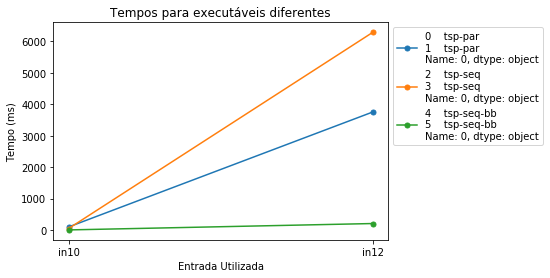

In [9]:
groups = df.groupby(0)

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group[1], group[3], marker='o', linestyle='-', ms=5, label=group[0])
plt.title('Tempos para executáveis diferentes')
plt.ylabel('Tempo (ms)')
plt.xlabel('Entrada Utilizada')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()